In [1]:
import numpy as np                  # import를 이용하여 nimpy와 matplotlib를 가져온다.
import matplotlib.pyplot as plt

In [2]:
class stock:
    def __init__(self, stock_name, stock_price, expected_return, volatility, net_income):
        
        #생성자함수__init__을 통해 주식이름, 주식가격, 기대수익, 변동성, 당기순이익을 저장해둔다.
        self.name = stock_name
        self.S = stock_price
        self.ret = expected_return
        self.vol = volatility
        self.N_income = net_income   
        
        
    def S_after_T(self, T, seed, size):       # T년 후의 예상 주가를 알 수 있는 함수
        np.random.seed(seed)                  # 함수를 사용할 때마다 변하는 값이 시드값을 지정하여 변하지 않도록 한다.
        z = np.random.normal(0, 1, size)      # 평균=0, 표준편차=1인 정규분포에서 size개의 샘플을 생성한다.
        self.S_T = self.S * np.exp((self.ret - 0.5*pow(self.vol,2)*T) + self.vol*T**0.5*z)
       
        # T년 후의 주가가 따르는 분포를 만들고 그것을 self.S_T에 저장한다.
    
        print("예상되는 {0}년 후 주가 {1}개는 {2}입니다.".format(T, size, self.S_T))
        # T년 후와 size, self.S_T를 print해준다.
    
    def sample_mean_and_var(self,T, seed, n):  # T년 후 주가 샘플 n개에 대해 표본평균과 표본분산을 리턴하는 함수
        
        # 클래스 내 함수 S_after_T처럼 T년 후 예상 주가를 구한다.
        np.random.seed(seed)
        z = np.random.normal(0, 1, n)
        self.S_T = self.S * np.exp((self.ret - 0.5*pow(self.vol,2)*T) + self.vol*T**0.5*z)
        
        sample_mean = self.S_T.mean()      # .mean()을 통해 평균을 구하고 이것을 sample_mean에 저장한다.
        sample_var = self.S_T.std(ddof = 1)**2
        # .std(ddof=1)을 통해 표본표준편차를 구하고 제곱한 후 이것을 sample_std에 저장한다.
        
        print("예상되는 주가의 표본평균은 %f이고, 표본분산은 %f입니다."%(sample_mean, sample_var))
        # 계산된 표본평균과 표본편차를 print하여 알려준다.
    
    def dividend(self, div_rate):                                        # 배당률을 입력하면 배당금을 계산해주는 함수
        print("현재 배당금은 %f원입니다."%(self.S * div_rate))           # 계산된 배당금을 print하여 알려준다.
    
    def PER(self):                                   # 주당순이익을 계산해 보여주는 함수
        S_per = self.S/self.N_income                 # 주당순이익을 계산한다.
        print("현재 PER은 %0.9f입니다."%S_per)       # 계산된 주당순이익을 print하여 알려준다.
        
    def graph_S_after_T(self, T, seed, n):  # 예상주가와 이것의 평균을 그래프를 통해 알려주는 함수
        t = np.linspace(1, n, n)            # 그래프의 가로축에 해당하는 값을 t에 저장한다.
        self.S_after_T(T, seed, n)          # 클래스 내의 함수 S_after_T를 사용하여 예상주가를 구한다.
        
        mean = self.S_T.mean()              # 예상주가들의 평균을 구하고 이것을 mean에 저장한다.
        
        
        plt.figure(figsize = (7, 4))                                        # 그래프의 크기를 지정한다.
        plt.plot(t, self.S_T, 'r.', label='stock_price')                    # 그래프의 x축, y축, 색, 표현방식, 라벨을 정한다.
        plt.axhline(mean, label='Mean')                         # axhline으로 평균을 그래프에 가로선으로 추가, 라벨을 정한다.
        plt.text(1,mean+100,'Mean of Stock price : %f'%mean,fontsize=10)    # 그래프에 mean값을 알려주는 text를 추가한다.
        plt.legend()                                                        # 범례를 표현한다.
        plt.title("Expected Stock Price")                                   # 그래프의 제목을 만든다.
        plt.xlabel("count")                                                 # x축 이름을 만든다.
        plt.ylabel("stock price_after_T_years")                             # y축 이름을 만든다.
        plt.show()                                                          # 그래프를 보여준다.

In [3]:
K_Inc = stock("K.Inc.", 71400, 0.1, 0.05, 1400000000000)
#K_Inc라는 이름을 가진 주식의 현재 가격은 71400원이고 기대수익률은 0.1, 변동성은 0.05, 당기순이익은 1.4조이다.

K_Inc.S_after_T(1,9347, 3)     # K_Inc 주식의 1년 후 예상주가를 3개 구한다.

K_Inc.sample_mean_and_var(1, 9347, 10)      # K_Inc 주식의 1년 후 예상주가를 통해 표본평균과 표본분산을 구한다.

K_Inc.dividend(0.032)                      # K_Inc의 배당률이 3.2%일때의 배당금을 현재 주가 기준으로  구한다.

K_Inc.PER()                                # 현재 주가와 당기순이익을 기준으로 K_Inc 의 주당순이익을 계산한다.

예상되는 1년 후 주가 3개는 [77958.67895274 78457.76017744 74249.13304533]입니다.
예상되는 주가의 표본평균은 79517.576194이고, 표본분산은 27168361.050915입니다.
현재 배당금은 2284.800000원입니다.
현재 PER은 0.000000051입니다.


예상되는 1년 후 주가 10개는 [77958.67895274 78457.76017744 74249.13304533 83206.28175711
 82245.87201832 78830.31799798 73687.05836706 90681.26275369
 74186.88080005 81672.51606995]입니다.


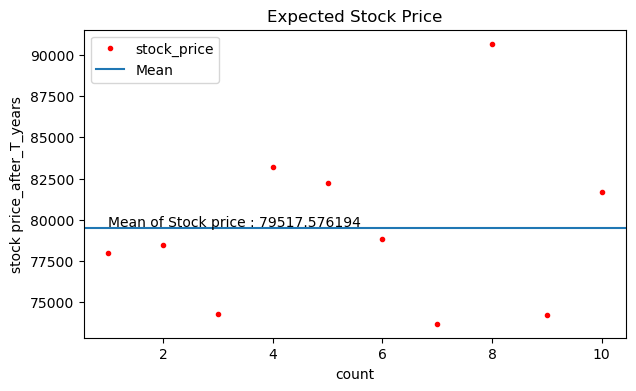

In [4]:
K_Inc.graph_S_after_T(1, 9347, 10)         # 1년 후 K_Inc 의 예상주가 10개와 평균을 표시한다.

In [5]:
T = 2         # T를 2로 정해둔다.

print('10_sample :')
K_Inc.sample_mean_and_var(T, 9340, 10)         # T년 후에 예상되는 주가 10개로 표본평균과 표본분산을 구한다.

print('100_sample :')
K_Inc.sample_mean_and_var(T, 9340, 100)        # T년 후에 예상되는 주가 100개로 표본평균과 표본분산을 구한다.

print('3000000_sample :')
K_Inc.sample_mean_and_var(T, 9340, 3000000)    # T년 후 예상주가 3000000개로 표본평균, 표본분산을 구한다.

print("=" * 25)

average = K_Inc.S * np.exp(K_Inc.ret * T)     # 평균을 구하는 식을 만들어 계산하고 이것을 average에 저장한다.
var = K_Inc.S**2 * np.exp(2 * K_Inc.ret * T ) * (np.exp(K_Inc.vol**2 * T) - 1)     
# 분산을 구하는 식을 만들어 분산을 계산하고, 이것을 var에 저장한다.

print("따로 계산한 평균은 {0}이고, 분산은 {1}입니다.".format(average, var))
# 저장된 평균과 분산을 print해준다.

10_sample :
예상되는 주가의 표본평균은 80778.032175이고, 표본분산은 29986487.737576입니다.
100_sample :
예상되는 주가의 표본평균은 78623.624753이고, 표본분산은 25924597.672443입니다.
3000000_sample :
예상되는 주가의 표본평균은 78908.646551이고, 표본분산은 31182386.552037입니다.
따로 계산한 평균은 87208.15693263612이고, 분산은 38121537.602104016입니다.
